In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import os

In [3]:
from baseSetterHelper import setAllSeeds, setDeterministic, computeAccu
from trainerHelper import modelTrainer
from plottingHelper import plotTrainingLoss, plotAccuracy
from dataLoaderHelper import getDataLoadersMNIST

In [4]:
RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 75
NUM_HIDDEN_2 = 45
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [5]:
setAllSeeds(RANDOM_SEED)
setDeterministic()

In [6]:
trainLoader, validLoader, testLoader = getDataLoadersMNIST(
    batchSize=BATCH_SIZE,
    validFraction=0.1)

# Checking the dataset
for images, labels in trainLoader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

100%|██████████| 9912422/9912422 [00:00<00:00, 414455721.48it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 49829573.77it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 112309251.48it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 13350055.20it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


In [7]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, numFeatures, numClasses, dropProba, numHidden1, numHidden2):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(numFeatures, numHidden1),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropProba),
            # 2nd hidden layer
            torch.nn.Linear(numHidden1, numHidden2),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropProba),
            # output layer
            torch.nn.Linear(numHidden2, numClasses)
        )

    def forward(self, x):
        logits = self.my_network(x)
        return logits

# With Drop Probability 0

In [8]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.0,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [9]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:2.3093
Epoch:001/050 | Batch:050/210 |  Cost:1.8443
Epoch:001/050 | Batch:100/210 |  Cost:0.7622
Epoch:001/050 | Batch:150/210 |  Cost:0.6539
Epoch:001/050 | Batch:200/210 |  Cost:0.5036
Epoch:001/050 |
Train Acc 86.5625%
Val Acc   89.1167%
Time Taken: 0.40 min
Epoch:002/050 | Batch:000/210 |  Cost:0.4685
Epoch:002/050 | Batch:050/210 |  Cost:0.4341
Epoch:002/050 | Batch:100/210 |  Cost:0.3330
Epoch:002/050 | Batch:150/210 |  Cost:0.3330
Epoch:002/050 | Batch:200/210 |  Cost:0.3604
Epoch:002/050 |
Train Acc 90.2288%
Val Acc   92.1500%
Time Taken: 0.68 min
Epoch:003/050 | Batch:000/210 |  Cost:0.2568
Epoch:003/050 | Batch:050/210 |  Cost:0.2746
Epoch:003/050 | Batch:100/210 |  Cost:0.2673
Epoch:003/050 | Batch:150/210 |  Cost:0.2206
Epoch:003/050 | Batch:200/210 |  Cost:0.3525
Epoch:003/050 |
Train Acc 91.0863%
Val Acc   92.5667%
Time Taken: 0.95 min
Epoch:004/050 | Batch:000/210 |  Cost:0.3443
Epoch:004/050 | Batch:050/210 |  Cost:0.2957
Epoch:004/

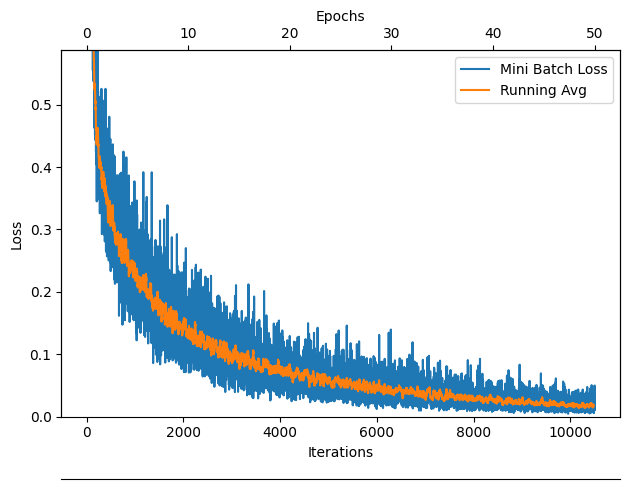

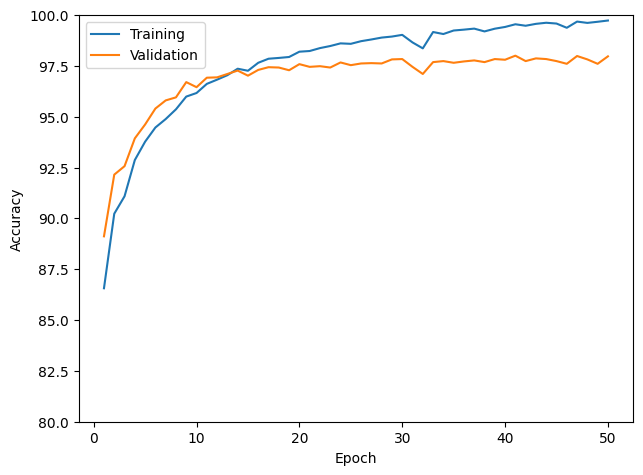

In [10]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()

# With Drop Probability 0.5

In [11]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.5,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [12]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:2.3132
Epoch:001/050 | Batch:050/210 |  Cost:2.0828
Epoch:001/050 | Batch:100/210 |  Cost:1.5250
Epoch:001/050 | Batch:150/210 |  Cost:1.2467
Epoch:001/050 | Batch:200/210 |  Cost:1.0186
Epoch:001/050 |
Train Acc 82.3624%
Val Acc   85.4667%
Time Taken: 0.29 min
Epoch:002/050 | Batch:000/210 |  Cost:0.9355
Epoch:002/050 | Batch:050/210 |  Cost:0.9608
Epoch:002/050 | Batch:100/210 |  Cost:0.7889
Epoch:002/050 | Batch:150/210 |  Cost:0.7475
Epoch:002/050 | Batch:200/210 |  Cost:0.6573
Epoch:002/050 |
Train Acc 88.2459%
Val Acc   90.5000%
Time Taken: 0.56 min
Epoch:003/050 | Batch:000/210 |  Cost:0.7553
Epoch:003/050 | Batch:050/210 |  Cost:0.6540
Epoch:003/050 | Batch:100/210 |  Cost:0.5696
Epoch:003/050 | Batch:150/210 |  Cost:0.7052
Epoch:003/050 | Batch:200/210 |  Cost:0.5454
Epoch:003/050 |
Train Acc 90.1953%
Val Acc   92.0833%
Time Taken: 0.83 min
Epoch:004/050 | Batch:000/210 |  Cost:0.6222
Epoch:004/050 | Batch:050/210 |  Cost:0.5641
Epoch:004/

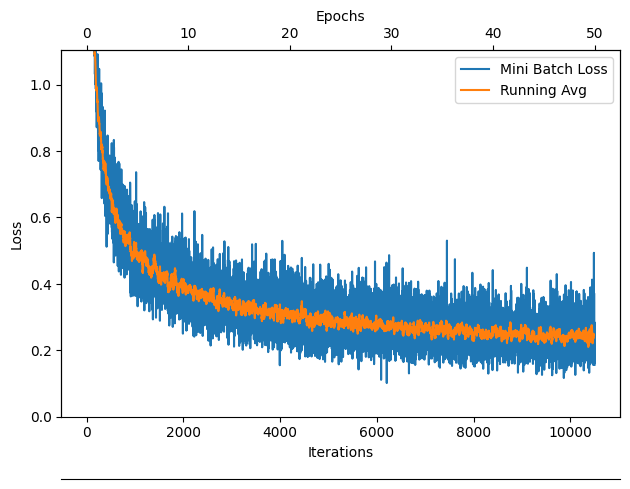

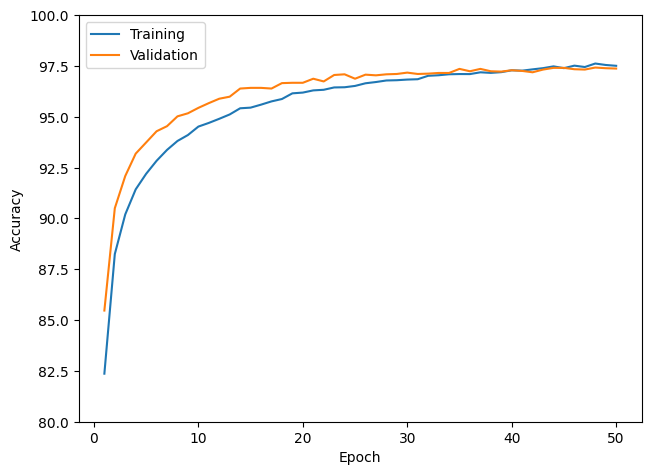

In [13]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()